In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
sns.set(style='white')

In [103]:
df = pd.read_csv("/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/mushra.csv")

In [104]:
df = df[df['trial_id'] != 'training']
df = df[df['session_uuid'] != '6078451d-adce-43a1-9289-46e0dd3514e1']

In [105]:
df

,session_test_id,session_uuid,trial_id,rating_stimulus,rating_score,rating_time,rating_date,rating_comment
51,style_transfer,b855b983-a931-4629-8617-a915d82251b0,multiband0,end2end,85,81117,"28/03/2023, 09:25:40",NaN
52,style_transfer,b855b983-a931-4629-8617-a915d82251b0,multiband0,style_transfer,100,81117,"28/03/2023, 09:25:40",NaN
53,style_transfer,b855b983-a931-4629-8617-a915d82251b0,multiband0,anchor,61,81117,"28/03/2023, 09:25:40",NaN
54,style_transfer,b855b983-a931-4629-8617-a915d82251b0,multiband0,reference,100,81117,"28/03/2023, 09:25:40",NaN
55,style_transfer,b855b983-a931-4629-8617-a915d82251b0,multiband1,end2end,61,41036,"28/03/2023, 09:25:40",NaN
...,...,...,...,...,...,...,...,...
175,style_transfer,90913ed2-88a6-4281-8318-b57a5d240915,delay2,end2end,39,13277,"3/28/2023, 11:29:29 PM",NaN
176,style_transfer,90913ed2-88a6-4281-8318-b57a5d240915,delay2,anchor,82,13277,"3/28/2023, 11:29:29 PM",NaN
177,style_transfer,90913ed2-88a6-4281-8318-b57a5d240915,overdrive2,end2end,63,18423,"3/28/2023, 11:29:29 PM",NaN
178,style_transfer,90913ed2-88a6-4281-8318-b57a5d240915,overdrive2,anchor,81,18423,"3/28/2023, 11:29:29 PM",NaN


In [106]:
palette = sns.color_palette(n_colors=4).as_hex()
names = ['end2end', 'style_transfer', 'reference', 'anchor']
colour_map = {name: palette[i] for i, name in enumerate(names)}

format_map = {
    'end2end': 'Our model',
    'anchor': 'Anchor',
    'reference': 'Reference',
    'style_transfer': 'DeepFX-ST'
}

In [127]:
def boxplot_effect(df, effect_name):
    fx = df[df['trial_id'].str.contains(effect_name.lower())]
    order = fx.groupby(by=["rating_stimulus"])['rating_score'].median().sort_values().index
    
    my_colours = [colour_map[fx] for fx in order]
    sns.set_palette(my_colours)
    
    ax = sns.boxplot(fx, x='rating_stimulus', y='rating_score', order=order)
    
    ax.set_xlabel("Rating Stimulus")
    ax.set_ylabel("Rating Score")
    ax.set_ylim([0,105])
    ax.yaxis.grid(True)
    
    labels = [format_map[x] for x in order]
    ax.set_xticklabels(labels, 
#                        rotation=20, 
#                        fontsize=12
                      )
    
    ax.set_title(effect_name.title())
    plt.show()

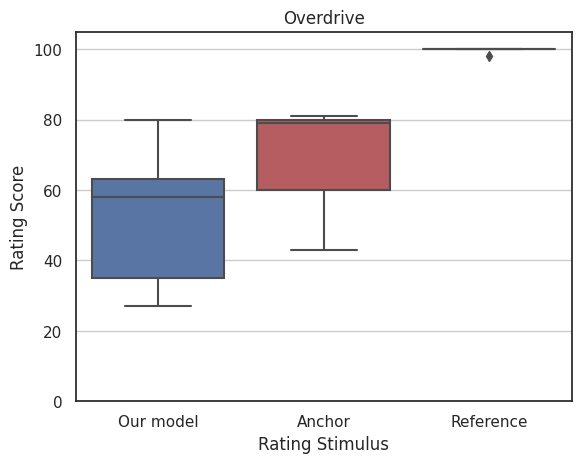

In [128]:
boxplot_effect(df, 'overdrive')

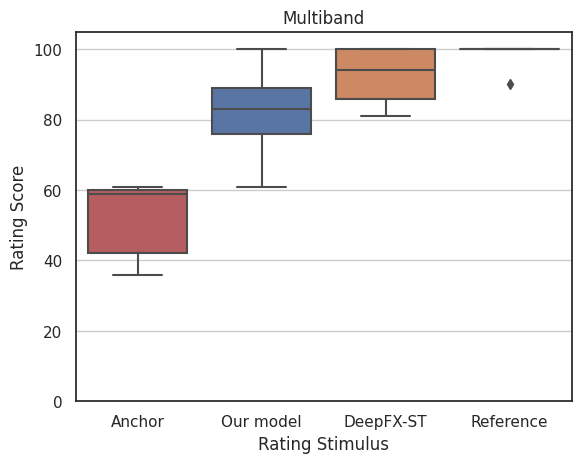

In [129]:
boxplot_effect(df, 'multiband')

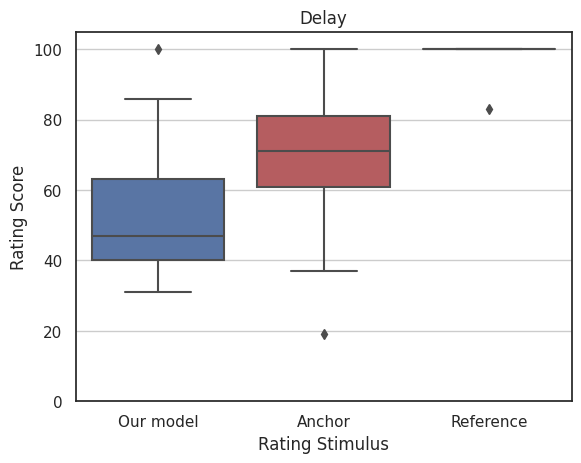

In [130]:
boxplot_effect(df, 'delay')

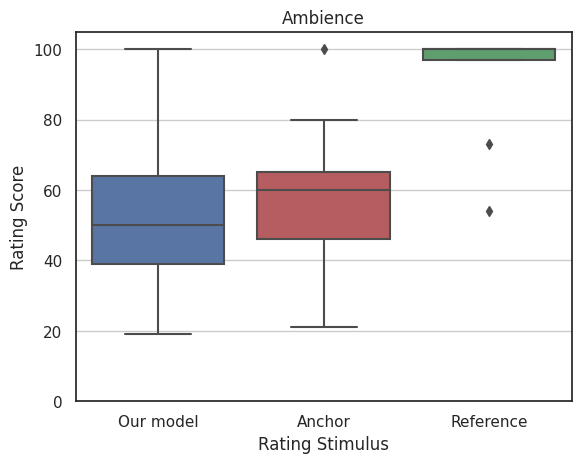

In [131]:
boxplot_effect(df, 'ambience')